In [1]:
#Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#Add the latitudes and longitudes to a list
coordinates=list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [6]:
#Import requests library
import requests
#Import the API key
from config import weather_api_key

In [7]:
#Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [8]:
#Import the datetime module from the datetime library
from datetime import datetime

In [9]:
#Create an empty list to hold the weather data
city_data=[]
#Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count=1
set_count=1

#Loop through all the cities in our list
#for i in range(len(cities)):
    #Group cities in sets of 50 for logging purposes
 #   if (i % 50==0 and i>=50):
  #      set_count+=1
   #     record_count=1
    #Create endpoint URL with each city
    #city_url=url+"&q="+cities[i]

#Instead of two for loops use the enumerate function
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | soyo
Processing Record 2 of Set 1 | bengkulu
Processing Record 3 of Set 1 | amazar
Processing Record 4 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 5 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 6 of Set 1 | thompson
Processing Record 7 of Set 1 | haines junction
Processing Record 8 of Set 1 | bluff
Processing Record 9 of Set 1 | bambous virieux
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | gorontalo
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | meadow lake
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | esperance
Processing Record 20 of Set 1 | flagstaff
Processing Record 21 of Set 1 | ahipara
Processing Record 

Processing Record 33 of Set 4 | porto santo
Processing Record 34 of Set 4 | dubai
Processing Record 35 of Set 4 | dingle
Processing Record 36 of Set 4 | kisangani
Processing Record 37 of Set 4 | kuche
City not found. Skipping...
Processing Record 38 of Set 4 | sherbakul
Processing Record 39 of Set 4 | bemidji
Processing Record 40 of Set 4 | tucupita
Processing Record 41 of Set 4 | narsaq
Processing Record 42 of Set 4 | matara
Processing Record 43 of Set 4 | kashiwazaki
Processing Record 44 of Set 4 | kruisfontein
Processing Record 45 of Set 4 | lorengau
Processing Record 46 of Set 4 | lata
Processing Record 47 of Set 4 | simplicio mendes
Processing Record 48 of Set 4 | carroll
Processing Record 49 of Set 4 | katsuura
Processing Record 50 of Set 4 | salinopolis
Processing Record 1 of Set 5 | nuevo progreso
Processing Record 2 of Set 5 | caetite
Processing Record 3 of Set 5 | inca
Processing Record 4 of Set 5 | carnarvon
Processing Record 5 of Set 5 | hasaki
Processing Record 6 of Set 5 

Processing Record 22 of Set 8 | morgan city
Processing Record 23 of Set 8 | srednekolymsk
Processing Record 24 of Set 8 | pueblo bello
Processing Record 25 of Set 8 | narrabri
Processing Record 26 of Set 8 | namatanai
Processing Record 27 of Set 8 | college
Processing Record 28 of Set 8 | ostrovnoy
Processing Record 29 of Set 8 | bathsheba
Processing Record 30 of Set 8 | tahoua
Processing Record 31 of Set 8 | artvin
Processing Record 32 of Set 8 | te anau
Processing Record 33 of Set 8 | kushmurun
Processing Record 34 of Set 8 | leua
Processing Record 35 of Set 8 | avesta
Processing Record 36 of Set 8 | le havre
Processing Record 37 of Set 8 | sorvag
City not found. Skipping...
Processing Record 38 of Set 8 | wuwei
Processing Record 39 of Set 8 | sibolga
Processing Record 40 of Set 8 | half moon bay
Processing Record 41 of Set 8 | kudahuvadhoo
Processing Record 42 of Set 8 | belmonte
Processing Record 43 of Set 8 | amasia
Processing Record 44 of Set 8 | port hardy
Processing Record 45 o

Processing Record 8 of Set 12 | vanavara
Processing Record 9 of Set 12 | pitkyaranta
Processing Record 10 of Set 12 | asfi
Processing Record 11 of Set 12 | yirol
City not found. Skipping...
Processing Record 12 of Set 12 | sundumbili
Processing Record 13 of Set 12 | mahibadhoo
Processing Record 14 of Set 12 | trojes
Processing Record 15 of Set 12 | mokshan
Processing Record 16 of Set 12 | urumqi
Processing Record 17 of Set 12 | pudem
Processing Record 18 of Set 12 | develi
Processing Record 19 of Set 12 | vallenar
Processing Record 20 of Set 12 | port augusta
Processing Record 21 of Set 12 | kahului
Processing Record 22 of Set 12 | czersk
Processing Record 23 of Set 12 | cumaribo
City not found. Skipping...
Processing Record 24 of Set 12 | zonguldak
Processing Record 25 of Set 12 | acarau
Processing Record 26 of Set 12 | bonfim
Processing Record 27 of Set 12 | dukat
Processing Record 28 of Set 12 | avera
Processing Record 29 of Set 12 | yarmouth
Processing Record 30 of Set 12 | ndele
P

In [10]:
#Convert the array of dictionaries to a pandas dataframe
city_data_df=pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Soyo,-6.1349,12.3689,82.45,79,83,9.71,AO,2021-10-23 16:53:36
1,Bengkulu,-3.8004,102.2655,75.97,91,64,4.36,ID,2021-10-23 16:49:22
2,Amazar,53.8580,120.8750,31.77,87,6,1.52,RU,2021-10-23 16:53:36
3,Thompson,55.7435,-97.8558,32.16,86,90,0.00,CA,2021-10-23 16:50:25
4,Haines Junction,60.7522,-137.5108,22.95,93,100,2.30,CA,2021-10-23 16:53:37
5,Bluff,-46.6000,168.3333,52.70,86,100,3.31,NZ,2021-10-23 16:53:38
6,Bambous Virieux,-20.3428,57.7575,75.45,78,75,12.66,MU,2021-10-23 16:53:38
7,Ushuaia,-54.8000,-68.3000,44.22,87,90,24.16,AR,2021-10-23 16:49:15
8,Gorontalo,0.5412,123.0595,74.93,92,99,2.26,ID,2021-10-23 16:53:39
9,Rikitea,-23.1203,-134.9692,74.50,82,67,19.71,PF,2021-10-23 16:53:39


In [11]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Soyo,AO,2021-10-23 16:53:36,-6.1349,12.3689,82.45,79,83,9.71
1,Bengkulu,ID,2021-10-23 16:49:22,-3.8004,102.2655,75.97,91,64,4.36
2,Amazar,RU,2021-10-23 16:53:36,53.8580,120.8750,31.77,87,6,1.52
3,Thompson,CA,2021-10-23 16:50:25,55.7435,-97.8558,32.16,86,90,0.00
4,Haines Junction,CA,2021-10-23 16:53:37,60.7522,-137.5108,22.95,93,100,2.30


In [12]:
#Create the output file (CSV)
output_data_file="weather_data/cities.csv"
#Export the city_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
#Extract relevant fields from the dataframe for plotting
lats=city_data_df["Lat"]
max_temps=city_data_df["Max Temp"]
humidity=city_data_df["Humidity"]
cloudiness=city_data_df["Cloudiness"]
wind_speed=city_data_df["Wind Speed"]

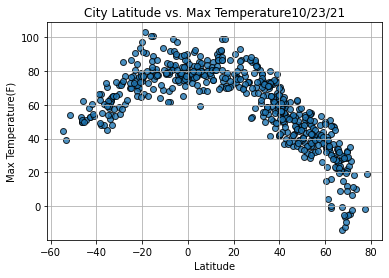

In [14]:
#Import time module
import time

#Build the scatter plot for latitude vs max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black",linewidths=1,marker="o",
           alpha=0.8,label="Cities")
#Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature"+ time.strftime("%x"))
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

#Show plot
plt.show()

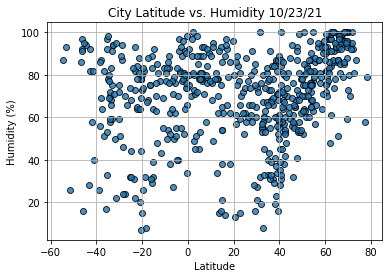

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

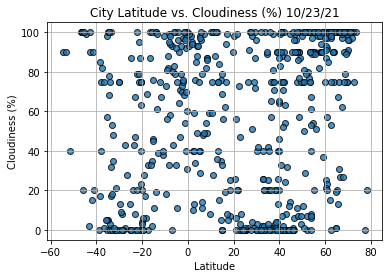

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

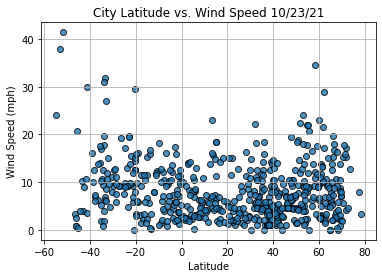

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
#Create a function to perform linear regression on the weater data and plot a regression line and the equation with the data
#def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                      Mataura
Country                        NZ
Date          2021-10-23 16:53:40
Lat                      -46.1927
Lng                      168.8643
Max Temp                    49.78
Humidity                       92
Cloudiness                    100
Wind Speed                   0.81
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4       True
       ...  
563     True
564     True
565     True
566     True
567     True
Name: Lat, Length: 568, dtype: bool

In [22]:
#Using loc to get a data frame with just the northern hemisphere
city_data_df.loc[(city_data_df["Lat"]>=0)].head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Amazar,RU,2021-10-23 16:53:36,53.8580,120.8750,31.77,87,6,1.52
3,Thompson,CA,2021-10-23 16:50:25,55.7435,-97.8558,32.16,86,90,0.00
4,Haines Junction,CA,2021-10-23 16:53:37,60.7522,-137.5108,22.95,93,100,2.30
8,Gorontalo,ID,2021-10-23 16:53:39,0.5412,123.0595,74.93,92,99,2.26
14,Meadow Lake,US,2021-10-23 16:53:40,34.8014,-106.5436,71.40,33,42,4.65


In [23]:
#Create nothern and southern hemisphere dataframes
northern_hemi_df=city_data_df.loc[(city_data_df["Lat"]>=0)]
southern_hemi_df=city_data_df.loc[(city_data_df["Lat"]<=0)]

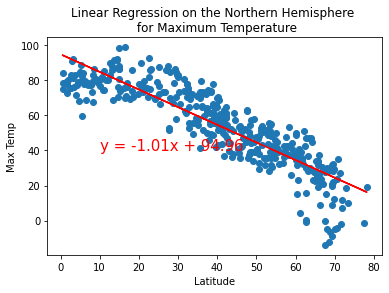

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

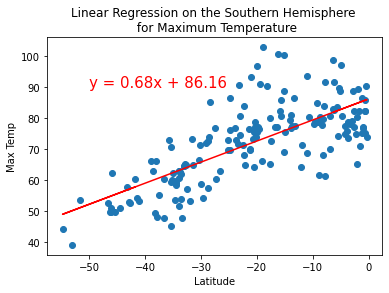

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

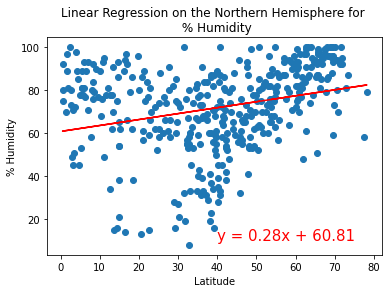

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for \n % Humidity', '% Humidity',(40,10))

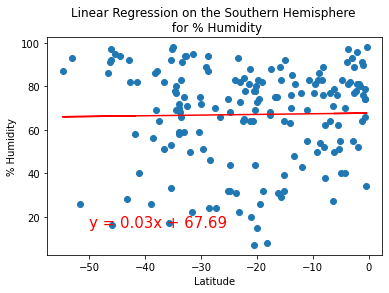

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

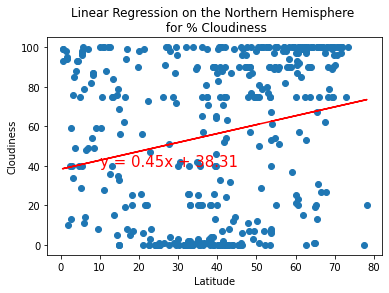

In [32]:
#SKILL DRILL Cloudiness
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 'Cloudiness',(10,40))

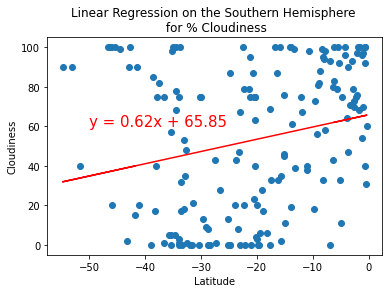

In [33]:
#SKILL DRILL Cloudiness
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 'Cloudiness',(-50,60))

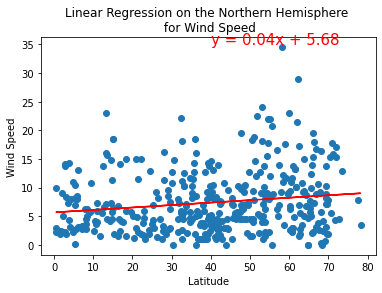

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

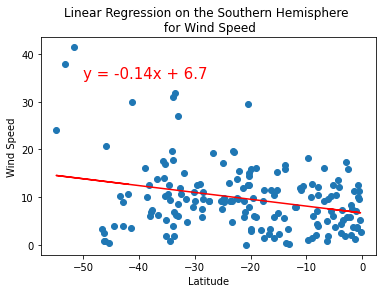

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))